<a href="https://colab.research.google.com/github/parwinderau/machinelearning/blob/main/MLAsnmnt_Drone_v0_1_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
data_file="./sample_data/Drone_Data_clndOutlier130.csv"
def load_data(file_name):
  with open(file_name, 'r',encoding = "utf-8") as file:
      for i in range(0,4):
          print(file.readline())

load_data(data_file)

Model,L,W,H,P,V,S,,,,,,,,,,,,,,,,,,,,

Perdix,155,300,60,1,2,30.56,,,,,,,,,,,,,,,,,,,,

DynaWerks Gale,900,850,360,1,1,33.33,,,,,,,,,,,,,,,,,,,,

TowHawk,680,860,200,1,2,18.06,,,,,,,,,,,,,,,,,,,,



In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import sklearn.linear_model

print("If there are no errors, modules are load!")

If there are no errors, modules are load!


In [ ]:
import pandas as pd

# Here we upload the data from csv files using pandas
# the comma separates the coulms and we see the countries in each line.
dataFrame = pd.read_csv(data_file, delimiter=',', encoding='utf-8') 
dataFrame = dataFrame.loc[:, ~dataFrame.columns.str.contains('^Unnamed')]


In [ ]:
#Rename Columns
#dataFrame=dataFrame.rename(columns={"UAV_Model":"M","Class":"C","Propellers": "P", "V_Stabilizer_and_Winglets": "V", "Max speed, m/s": "S"})

In [ ]:
# Now we want to separate those from the dataset
from sklearn import preprocessing
df = dataFrame[["L","W", "H", "P", "S"]]




In [ ]:
class Outlier:
    #Declare the static variables
    drop=False
    #Declaring a constructor, taking length and colour as a parameter
    def __init__(self, drop):
        self.drop = drop
        #print('Block of ' +colour +' colour is manufactured.')


In [ ]:

#Print Count of null values for each coloumn 
print(df.isnull().sum())

L    963
W    963
H    978
P    963
S    963
dtype: int64


In [ ]:

# drop all rows with any NaN and NaT values
df = df.dropna()
print(df.isnull().sum())

L    0
W    0
H    0
P    0
S    0
dtype: int64


In [ ]:
# Now we need to order the data according to the growing score
df_sorted = df.sort_values(by=["S"],ascending=True)
#https://stackabuse.com/linear-regression-in-python-with-scikit-learn/

df_sorted.dropna(
    axis=0,
    how='any',
    thresh=None,
    subset=None,
    inplace=True
)
#Tell you number of rows and columns in your data
df_sorted.shape


(120, 5)

In [ ]:
#correlation among fields/columns
print(df_sorted.corr())

          L         W         H         P         S
L  1.000000  0.917307  0.822889  0.074465  0.605860
W  0.917307  1.000000  0.815332  0.049866  0.599037
H  0.822889  0.815332  1.000000  0.025514  0.570533
P  0.074465  0.049866  0.025514  1.000000  0.065805
S  0.605860  0.599037  0.570533  0.065805  1.000000


In [ ]:


df_normalized=df_sorted
#df_normalized.head()

In [ ]:
#print(df_normalized.head(38))

In [ ]:
#print(df_normalized.describe())

In [ ]:
import seaborn as sns
#Outlier for specific column
def outlierPlot(df, columnName, state):
  sns.boxplot(df[columnName])
  plt.title(columnName+":"+state)
  plt.show()
'''
for column in df_normalized:
    outlierPlot(df_normalized,column)
'''

'\nfor column in df_normalized:\n    outlierPlot(df_normalized,column)\n'

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


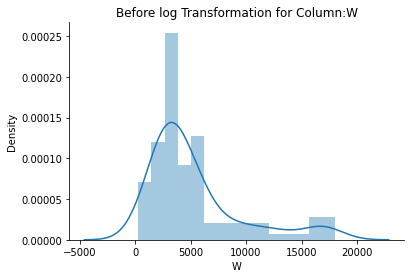

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


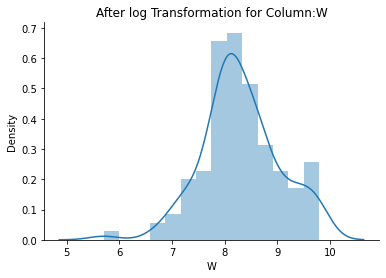

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


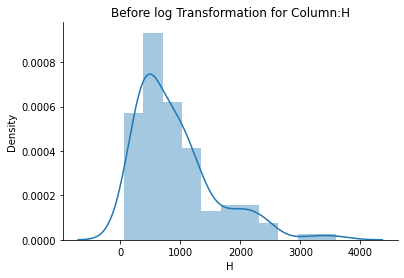

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


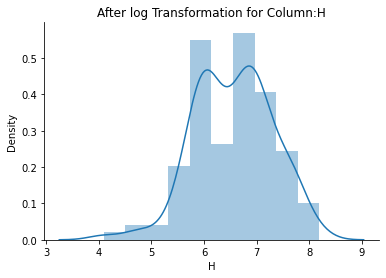

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


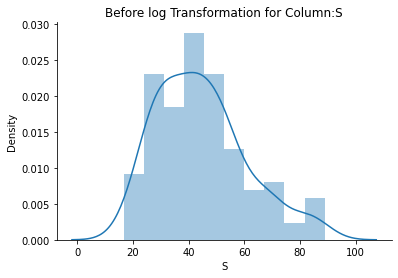

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


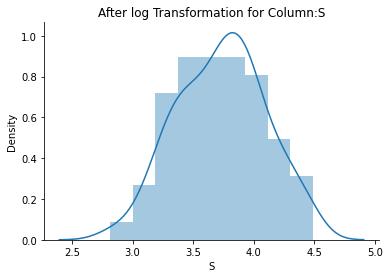

In [ ]:
def colLogTransformation(df, colName):
  col_to_transform=df[colName]
  sns.distplot(col_to_transform)
  plt.title("Before log Transformation for Column:"+ colName)
  sns.despine()
  plt.show()
  col_to_transform=np.log(col_to_transform)
  sns.distplot(col_to_transform)
  plt.title("After log Transformation for Column:"+colName)
  sns.despine()
  plt.show()
  df_normalized[colName]=col_to_transform

colLogTransformation(df_normalized,"W")
colLogTransformation(df_normalized,"H")
colLogTransformation(df_normalized,"S")
#for column in df_normalized:
#    colLogTransformation(df_normalized,column)


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


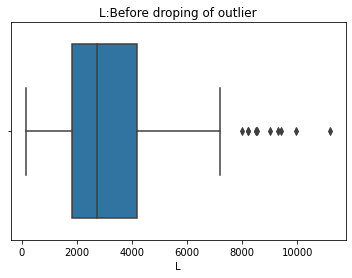

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


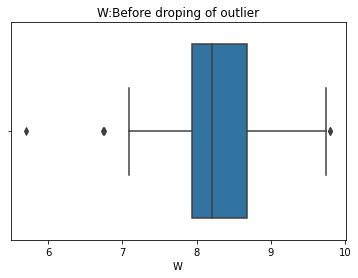

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


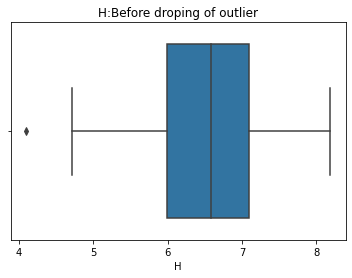

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


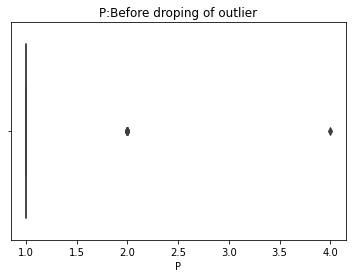

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


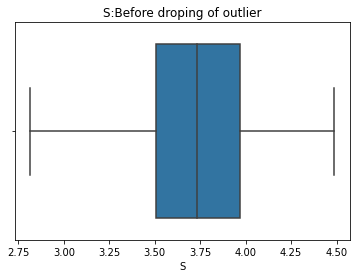

No. of rows Before 120


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


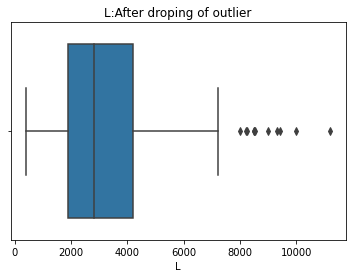

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


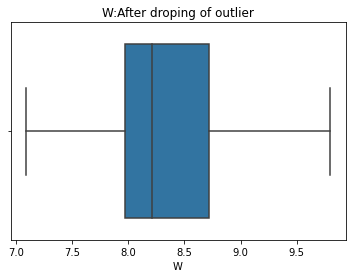

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


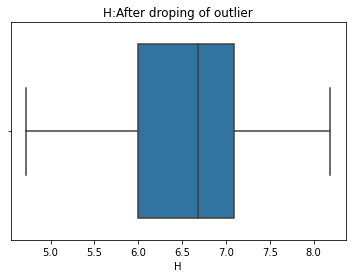

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


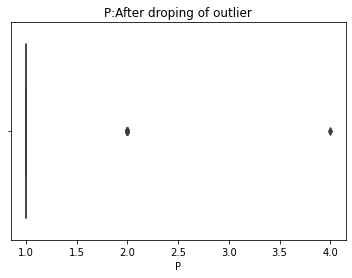

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


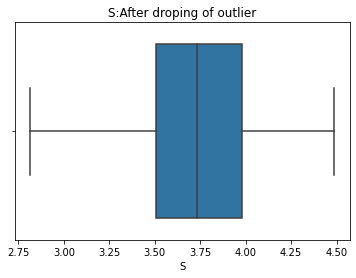

No. of rows After 117


In [ ]:
#Remove Outliers..run only once
def drop_outliers(df, colName):
  iqr=1.5*(np.percentile(df[colName],75) - np.percentile(df[colName],25))
  df.drop(df[df[colName] > (iqr+np.percentile(df[colName],75))].index, inplace=True)
  df.drop(df[df[colName] < (np.percentile(df[colName],25)-iqr)].index, inplace=True)
  Outlier.drop=True

#See data for outliers  
for column in df_normalized:
    outlierPlot(df_normalized,column,"Before droping of outlier")
print("No. of rows Before", df_normalized.shape[0])
drop_outliers(df_normalized,'H')
drop_outliers(df_normalized,'W')


#See data for outliers  
for column in df_normalized:
    outlierPlot(df_normalized,column,"After droping of outlier")
print("No. of rows After", df_normalized.shape[0])

In [ ]:
#Multiple linear Regressor
#https://www.analyticsvidhya.com/blog/2021/05/multiple-linear-regression-using-python-and-scikit-learn/


#df_normalized.hist(bins=50, figsize=(20,15))
#save_fig('histograms')
'''
plt.figure()
plt.plot(df_normalized['L'],'.', label='L')
plt.plot(df_normalized['W'],'.', label='W')
plt.plot(df_normalized['H'],'.', label='H')
plt.plot(df_normalized['H'],'.', label='S')
plt.legend()
plt.show()
'''

"\nplt.figure()\nplt.plot(df_normalized['L'],'.', label='L')\nplt.plot(df_normalized['W'],'.', label='W')\nplt.plot(df_normalized['H'],'.', label='H')\nplt.plot(df_normalized['H'],'.', label='S')\nplt.legend()\nplt.show()\n"

In [ ]:
np.random.seed(42)
from sklearn.model_selection import train_test_split
'''
d= df_normalized.drop(columns = 'H')
d=preprocessing.normalize(d)
X=pd.DataFrame(d, columns=["L", "W"])
'''
X= df_normalized.drop(columns = ['L','S'])
y=df_normalized['S']
print("Total X vs Total Y records: ",X.shape, y.shape)
X_train, X_test,y_train,y_test = train_test_split(X,y, test_size=0.2, random_state=42)
print (X_train.shape,X_test.shape, y_train.shape, y_test.shape )
#test_set.head()

Total X vs Total Y records:  (117, 3) (117,)
(93, 3) (24, 3) (93,) (24,)


In [ ]:
y.head(11)

14    2.813611
11    3.036394
64    3.100993
39    3.100993
24    3.100993
41    3.161670
16    3.161670
10    3.218876
17    3.218876
54    3.218876
5     3.241029
Name: S, dtype: float64

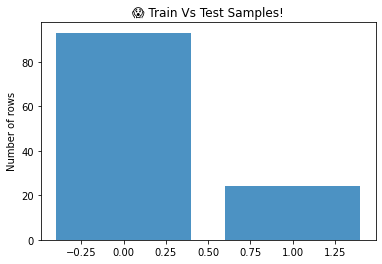

In [ ]:

d_names = (X_train, y_test)
y_pos = range(len(d_names))
plt.bar(
    y_pos, 
    (X_train.shape[0], y_test.shape[0]), 
    align='center', 
    alpha=0.8
)

plt.ylabel('Number of rows') 
plt.title('😱 Train Vs Test Samples!')
plt.show()


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
#X_train_scaled = X_train
#X_test_scaled = X_test
#df_prepared = full_pipeline.fit_transform(df_lw)
#label_prepared = full_pipeline.transform(df_h_label) 
#df_prepared
#X_test_scaled

In [ ]:

from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
#from sklearn.linear_model import SVR
#reg = LogisticRegression(random_state=42)
#reg = RandomForestRegressor(n_estimators=4, random_state=42)
#reg = SVR(kernel="linear")
reg = LinearRegression()
reg.fit(X_train_scaled,y_train)
algo=reg.__class__.__name__


In [ ]:
#reg.predict(X_train_scaled)


In [ ]:
print("Train Score:",reg.score(X_train_scaled,y_train))
print("Test Score:",reg.score(X_test_scaled,y_test))


Train Score: 0.8358682415381102
Test Score: 0.5389754840269326


In [ ]:
#value wise prediction
some_data = X_train.iloc[:5]
some_labels = y_train.iloc[:5]
# Part of the dataset (not used for training) is used to build for the prediction
some_data_prepared = scaler.transform(some_data)

print("Predictions:", reg.predict(some_data_prepared))
print("Labels:", list(some_labels))

Predictions: [3.32431634 3.89587579 3.50645789 3.41969196 3.91186926]
Labels: [3.3243163373261977, 3.8548175316573667, 3.506457892319648, 3.4196919642983197, 3.7297814454343623]


In [ ]:
test_data = X_test
test_labels = y_test
test_data_prepared = scaler.transform(test_data)
test_data_predictions=reg.predict(test_data_prepared)
print("Predictions:", test_data_predictions)
print("Labels:", list(test_labels))
#reg.score(test_data_prepared,test_labels)

Predictions: [3.43980649 3.62841517 3.75803433 3.57719693 3.471137   3.93818883
 3.99771004 3.68995919 3.42846482 3.55643465 3.77878163 3.7823897
 4.08995334 4.01469847 3.20457446 3.31323237 3.55335302 4.02898933
 4.01469847 3.72978145 3.32431634 4.00098817 4.08995334 3.32431634]
Labels: [3.660737148167656, 3.100992784211484, 3.7297814454343623, 3.660737148167656, 3.241028629509334, 3.9394436010041383, 3.883829271057364, 4.017463517886143, 3.506457892319648, 3.3243163373261977, 3.5473158897921495, 3.506457892319648, 4.041998081849892, 4.240463070352095, 3.3243163373261977, 2.813610696762703, 3.7941399647714293, 4.409398581469732, 3.912023005428146, 4.157162854614252, 3.8370839187636525, 4.017463517886143, 4.455625548708074, 3.3243163373261977]


In [ ]:
y_train

37    3.324316
84    3.854818
3     3.506458
63    3.419692
85    3.729781
        ...   
43    4.240463
34    3.324316
62    4.017464
87    3.729781
50    4.199755
Name: S, Length: 93, dtype: float64

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
df_predictions = reg.predict(X_train_scaled)
print("Count of Values equals in Prediction Column=",(df_predictions == 0).sum())
mse = mean_squared_error(y_train, df_predictions)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_train, df_predictions)
mape = mean_absolute_percentage_error(y_train, df_predictions)
#print('My name is', os.getlogin(), 'and I am', 42)
print ('Training results- MSE:',mse ,'RMSE:', rmse, 'and MAE:', mae, 'and MAPE:', mape) 
print ("{:<10} {:<10} {:<10} {:<10} {:<10} {:<10} ".format(algo, Outlier.drop, mse, rmse, mae, mape))

Count of Values equals in Prediction Column= 0
Training results- MSE: 0.019218982370120975 RMSE: 0.1386325444119128 and MAE: 0.09874330068842202 and MAPE: 0.026747300542263975
RandomForestRegressor 1          0.019218982370120975 0.1386325444119128 0.09874330068842202 0.026747300542263975 


In [ ]:
def display_scores(scores):
    #print("Scores:", scores)
    print ("{:<8} {:<15}".format('Mean','StandardDeviation'))
    print ("{:<8} {:<15}".format(scores.mean(), scores.std()))
    
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

#print ('==================Error Validation=====================================') 
mse = mean_squared_error(test_labels, test_data_predictions)
rmse = np.sqrt(mse)
mae = mean_absolute_error(test_labels, test_data_predictions)
mape = mean_absolute_percentage_error(test_labels, test_data_predictions)

#print ('MSE:',mse ,'RMSE:', rmse, 'and MAE:', mae, 'and MAPE:', mape) 
# cross_val_score is a way to use the cross-validation in sklearn.
# cross validation https://scikit-learn.org/stable/modules/cross_validation.html
cross_validation_scores = cross_val_score(reg, X_train_scaled, y_train,
                                          scoring="neg_mean_squared_error", cv=10)
rmse_scores = np.sqrt(-cross_validation_scores)
train_score=reg.score(X_train_scaled,y_train)
test_score=reg.score(X_test_scaled,y_test)


#display_scores(rmse_scores)

In [ ]:
#Print Results
print ("{:<8} {:<15} {:<8} {:<15} {:<10} {:<10} {:<10} {:<10} {:<30} {:<30}".format('Algo','OutlierDrop','MSE','RMSE','MAE','MAPE','CV-Mean', 'CV-SD','train-score', 'test-score'))

print ("{:<10} {:<10} {:<10} {:<10} {:<10} {:<10} {:<10} {:<10} {:<10} {:<10}".format(algo, Outlier.drop, mse, rmse, mae, mape, rmse_scores.mean(),rmse_scores.std(), train_score, test_score))

Algo     OutlierDrop     MSE      RMSE            MAE        MAPE       CV-Mean    CV-SD      train-score                    test-score                    
RandomForestRegressor 1          0.0753188344383236 0.27444277078896356 0.22040228975830245 0.060678707955463346 0.3284622654578767 0.06905225689255987 0.8358682415381102 0.5389754840269326
